### Решение краевой задачи для обыкновенного дифференциального уравнения

Используя метод конечных разностей, составить решение краевой задачи для обыкновенного дифференциального уравнения с точностью $\varepsilon = 10^{-3}$; шаг $h = 0.1$.

1. $$\begin{cases} y'' - xy' + 2y = x + 1, \\ y(0.9) - 0.5y'(0.9) = 2, \\ y(1.2) = 1\end{cases}$$ 
на отрезке $x \in [0.9; 1.2]$

2. $$\begin{cases} y'' + 2y' - \frac{y}{x} = 3, \\ y(0.2) = 2, \\ 0.5y'(0.6) - y(0.6) = 1\end{cases}$$ 
на отрезке $x \in [0.2;0.6]$

Написать программу на Python получения приближенного решения краевой задачи для обыкновенного дифференциального уравнения. Решить системы линейных алгебраических уравнений, получаемых после аппроксимации, использовать библиотеки numpy/scipy. Представить решения в виде графика.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Определение сетки.

In [37]:
h = 0.1
e = 10 ** (-3)
a = [0.9, 1.2]
b = [0.2, 0.6]
ax = np.arange(a[0], a[1] + h, step=h)
bx = np.arange(b[0], b[1] + h, step=h)
ax, bx

(array([0.9, 1. , 1.1, 1.2]), array([0.2, 0.3, 0.4, 0.5, 0.6]))

Разбив отрезок $[0.9, 1.2]$ на части с шагом $h = 0.1$, получим четыре узловые точки с координатами $x_0 = 0.9;\space x_1 = 1;\space x_2 = 1.1;\space x_3 = 1.2$. Две точки $x_0 = 0.9\space и\space x_3 = 1.2$ являются конечными (краевыми), а две другие - внутренними. Аналогично и с уравнения 2

### 2. Аппроксимация методы конечных разностей

Заменим производные в исходном уравнении на конечно-разностные аналоги, во внутренних точках получим уравнения:

1. $$\frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} - x_i\frac{y_{i+1} - y_{i-1}}{2h} + 2y_i = x_i + 1$$
для $i = 1, 2$

2. $$\frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} + 2\frac{y_{i+1} - y_{i-1}}{2h} - \frac{y_i}{x_i} = 3$$
для $i = 1, 2, 3$


Из краевых условий составим конечно-разностные уравнения в конечных точках:

1. $$\begin{cases}y_0 - 0.5\frac{y_1 - y_0}{h} = 2 &(i = 0) \\ y_3 = 1 &(i = 3) \end{cases}$$

2. $$\begin{cases}y_0 = 2 &(i = 0) \\ 0.5\frac{y_4 - y_3}{h} - y_4 = 1 &(i = 4) \end{cases}$$

Данная задача сводится к решению системы уравнения

1. $$\begin{cases} y_0 - 0.5\frac{y_1 - y_0}{0.1} = 2 \\ \frac{y_2 - 2y_1 + y_0}{0.01} - \frac{y_2 - y_0}{0.2} + 2y_1 = 2 \\ \frac{y_3 - 2y_2 + y_1}{0.01} - 1.1\frac{y_3 - y_1}{0.2} + 2y_2 = 2.1 \\ y_3 = 1 \end{cases}$$
2. $$\begin{cases} y_0 = 2 \\ \frac{y_2 - 2y_1 + y_0}{0.01} + 2\frac{y_2 - y_0}{0.2} - \frac{y_1}{0.3} = 3 \\ \frac{y_3 - 2y_2 + y_1}{0.01} + 2\frac{y_3 - y_1}{0.2} - \frac{y_2}{0.4} = 3 \\ \frac{y_4 - 2y_3 + y_2}{0.01} + 2\frac{y_4 - y_2}{0.2} - \frac{y_3}{0.5} = 3 \\ 0.5\frac{y_4 - y_3}{0.1} - y_4 = 1 \end{cases}$$

Выполнив преобразования, имеем

1. $$\begin{cases} 6y_0 - 5y_1 = 2 \\ 95y_2 - 198y_1 + 105y_0 = 2 \\ 945y_3 - 1980y_2 - 1055y_1 = 21 \\ y_3 = 1 \end{cases}$$
2. $$\begin{cases} y_0 = 2 \\ 330y_2 - 610y_1 + 270y_0 = 9 \\ 220y_3 - 405y_2 + 180y_1 = 6 \\ 110y_4 - 202y_3 + 90y_2 = 3 \\ 4y_4 - 5y_3 = 1 \end{cases}$$

Подставив из четвертого уравнения (первого) значение $y_3$ ($y_0$) в третье уравнение (второе), получим для определения остальных неизвестных систему

1. $$\begin{cases} 6y_0 - 5y_1 = 2 \\ 105y_0 - 198y_1 + 95y_2 = 2 \\ - 1055y_1 - 1980y_2 = - 924 \end{cases}$$
2. $$\begin{cases} - 610y_1 + 330y_2 = -531 \\ 180y_1 - 405y_2 + 220y_3 = 6 \\   90y_2 - 202y_3 + 110y_4 = 3 \\  - 5y_3 + 4y_4 = 1 \end{cases}$$

### 3. Получение приближенного решения

In [38]:
A = np.array([[6, -5, 0], [105, -198, 95], [0, -1055, -1980]])
B = np.array(
    [[-610, 330, 0, 0], [180, -405, 220, 0], [0, 90, -202, 110], [0, 0, -5, 4]]
)
AB = np.array([2, 2, -924])
BB = np.array([-531, 6, 3, 1])

ay = np.insert(np.linalg.solve(A, AB), 3, 1)
by = np.insert(np.linalg.solve(B, BB), 0, 2)

ay, by

(array([0.73331453, 0.47997743, 0.21092112, 1.        ]),
 array([  2.        , 196.98082596, 362.50698132, 506.20353982,
        633.00442478]))

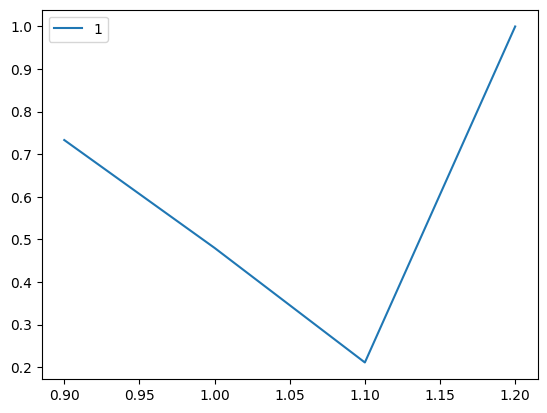

In [39]:
plt.plot(ax, ay, label="1")
plt.legend()
plt.show()

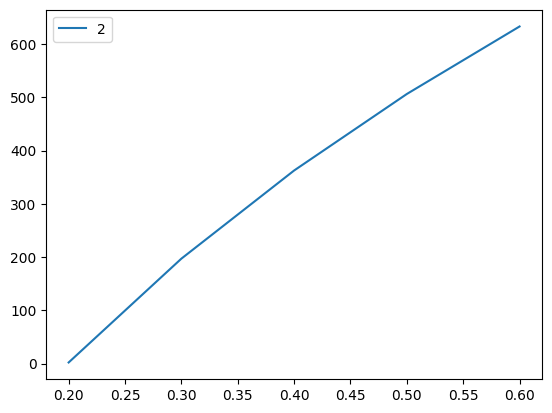

In [40]:
plt.plot(bx, by, label="2")
plt.legend()
plt.show()